In [2]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
from sklearn.datasets import load_boston
raw_boston = load_boston()

In [4]:
X = raw_boston.data
y = raw_boston.target

In [5]:
X.shape

(506, 13)

In [6]:
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

In [8]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_feat = X_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat, activation='relu'))
model.add(Dense(1))


In [14]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

In [15]:
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Train on 379 samples
Epoch 1/30
379/379 [==============================] - 0s 1ms/sample - loss: 479.8058 - mean_squared_error: 479.8058
Epoch 2/30
379/379 [==============================] - 0s 187us/sample - loss: 96.0528 - mean_squared_error: 96.0528
Epoch 3/30
379/379 [==============================] - 0s 195us/sample - loss: 86.8360 - mean_squared_error: 86.8360
Epoch 4/30
379/379 [==============================] - 0s 190us/sample - loss: 67.8890 - mean_squared_error: 67.8890
Epoch 5/30
379/379 [==============================] - 0s 187us/sample - loss: 59.9239 - mean_squared_error: 59.9239
Epoch 6/30
379/379 [==============================] - 0s 195us/sample - loss: 54.8727 - mean_squared_error: 54.8727
Epoch 7/30
379/379 [==============================] - 0s 201us/sample - loss: 50.7333 - mean_squared_error: 50.7333
Epoch 8/30
379/379 [==============================] - 0s 203us/sample - loss: 46.8916 - mean_squared_error: 46.8916
Epoch 9/30
379/379 [==============================]

In [16]:
print(model.evaluate(X_tn, y_tn)[1])

379/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [17]:
print(model.evaluate(X_te, y_te)[1])

127/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [20]:
import numpy as np
epoch = np.arange(1, epo+1)
print(epoch)
mse = hist.history['mean_squared_error']
print(mse)
loss = hist.history['loss']
print(loss)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[479.80582, 96.05276, 86.83602, 67.889046, 59.923912, 54.87275, 50.733337, 46.891636, 47.91318, 42.545, 46.031353, 38.95539, 36.92491, 35.151775, 35.911552, 34.05241, 37.505554, 34.23204, 35.768074, 33.896633, 36.529926, 35.129044, 35.667465, 33.191166, 35.46431, 33.681778, 31.91907, 33.43578, 32.628975, 33.581142]
[479.8057867266572, 96.05276463843272, 86.83602490211226, 67.88903902640129, 59.923903550824896, 54.8727391778951, 50.73334106606355, 46.891627373355675, 47.91318535238583, 42.54499501508899, 46.03134514348174, 38.95539415826269, 36.924916868788586, 35.15176821006634, 35.91155321931461, 34.05241524386846, 37.50555653307872, 34.232041703679634, 35.768075086196056, 33.8966295643658, 36.52993397976918, 35.129041377975945, 35.667474817160254, 33.19116497039795, 35.464309666905365, 33.68178024644273, 31.919067688541865, 33.43578045483, 32.62898172615071, 33.58114480154495]


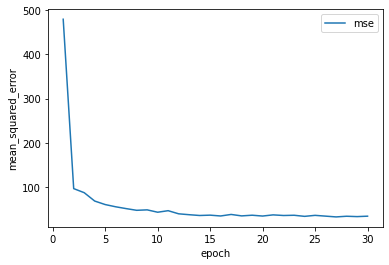

In [21]:
import matplotlib.pyplot as plt
plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

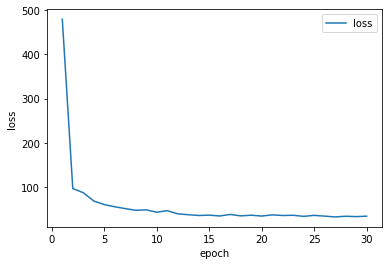

In [22]:
plt.plot(epoch, loss, label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
# 실제값, 예측값 데이터 프레임 생성
pred_y = model.predict(X_te).flatten()
print(pred_y)

[18.38285   21.89035   29.210144  12.31471   18.406876  23.43113
 15.859553  24.914833  16.14189    9.294703   6.7170844 11.368489
 14.627825   6.7244864 36.67672   27.281342  17.973854  34.286503
 27.691458  24.287607  25.912422  20.210985  19.433897  30.029926
 23.936989  13.367842  20.504671  13.566304  31.311975  18.66539
 14.933167  17.152193  21.314713  23.94491   27.90719   17.056578
  8.352997  21.032225   8.759735  10.108031  25.13804   21.402205
 16.385046  13.820687  20.497759  26.675518  19.269655  17.562706
 11.200679  23.877779   9.191823  14.153742  22.068829  26.003195
 10.400249  18.739088  21.041767  13.189086  16.5994    21.043015
 20.823236  21.80747   28.818846  27.226255  13.310875  28.460655
 15.756392  17.360317  11.365138  23.319937  19.143547  20.967897
 31.664627  28.251463  21.217918   2.907962  30.178116  23.352232
 25.981245  19.857769  26.331217  20.775394  18.789404  31.618547
 31.32097   24.926344  23.204046   6.528116  27.674707  13.214605
 14.547623  

In [25]:
import pandas as pd
res_df = pd.DataFrame(pred_y, columns=['predict_val'])
res_df['real_val'] = y_te
res_df.head(3)

,predict_val,real_val
0,18.382851,22.6
1,21.890350,50.0
2,29.210144,23.0


In [26]:
df_sort = res_df.sort_values(by='predict_val', ascending=True)

In [27]:
df_sort.head(3)

,predict_val,real_val
116,-2.027559,8.4
96,1.121594,13.8
106,1.388758,10.4


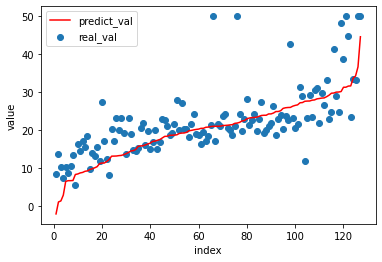

In [28]:
# 예측값, 실제값 그래프
idx = np.arange(1, len(df_sort)+1)
plt.scatter(idx, df_sort['real_val'], marker='o', label='real_val')
plt.plot(idx, df_sort['predict_val'], color='r', label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()